**Background Information**

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

First I'm going to import all the modules that are necessary for analysing and visualizing the data.

In [10]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.mlab as mlab
import seaborn as sns
import matplotlib.pylab as plt
sns.set(style='white')
%matplotlib inline

To simplify the analysis I define some functions, like the standard error and the t-statistic

In [11]:
se = lambda s, n: s / np.sqrt(n)
tstat = lambda xbar, mu, s, n: (xbar - mu)/se(s, n)
tconf = lambda x, tcrit, s, n: (x - tcrit * se(s, n), x + tcrit * se(s, n))

Now I can load the data into the pandas DataFrame.

In [12]:
data = pd.read_csv("./stroopdata.csv", sep=",")
print data

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


**Questions For Investigation**

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.
1. What is our independent variable? What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

** Answers For Investigation **

**Q1**

For this test, the independent variable is whether or not the words and the colors match, i.e. if the conditions are congruent (color and word match) or incongruent (color and word doesn't match). The dependent variable is the time it takes to say the color out loud.

**Q2**

The null hypothesis for this task is simply that there is no difference between the congruent and incongruent case: $$H_0: \mu_c = \mu_i$$ The alternative hypothesis on the other hand can't as simply be defined. We have the three following alternative hypothesis to choose from: $$H_a: \mu_c > \mu_i$$ $$H_a: \mu_c \neq \mu_i$$ $$H_a: \mu_c < \mu_i$$ The alternative hypothesis I choose is that $$H_a: \mu_c \neq \mu_i$$ This was chosen because I'm not sure if the incongruent case leads to a decrease or an increase in response time if any, and such the this is the only alternative hypothesis which takes both into account. The statistical test I will be performing is therefore a two-tailed t-test. The reason I must use the t-test, is that no population parameters are known and I'm therefore forced to analyse the samples with this test.

Since we are doing a two-sample t-test our null and alternative hypothesis can be rewritten as $$H_0: \mu_d = 0$$ $$H_a: \mu_d \neq 0$$ where $$\mu_d \equiv \mu_i - \mu_c$$ We therefore compute the difference between incongruent and congruent and calculate this mean. The standard error can now also be computed and since we have equal sample sizes and approximately equal variance, the standard error can be found as such: $$SE = \sqrt{\frac{s_1^2 + s_2^2}{n}}$$
**Q3**

Some descriptive statistics can now be found. By running the block of code below, we get the mean and the standard deviation of the congruent-and incongruent data as well as the mean and standard deviation of the difference, where the latter has been calculated using the following equation 
$$ S_d = \sqrt{s_1^2 + s_2^2} $$

In [23]:
n = float(len(data))
df = 2 * n - 2
print "Descriptive statistics and Central tendency"
print "Sample size: %4.2f" % n
print "Degrees of freedom: %i" % int(df)
D = data['Incongruent'] - data['Congruent']
data['D'] = D
xbar = data.mean()
sbar = data.std()
samples_m = xbar['D']
samples_s = np.sqrt(data.std()['Congruent']**2.0 + data.std()['Incongruent']**2.0)
print
print "Mean congruent: %4.2f" % xbar['Congruent']
print "Mean incongruent: %4.2f" % xbar['Incongruent']
print "Mean of difference: %4.2f" % samples_m
print "Standard deviation congruent: %4.2f" % sbar['Congruent']
print "Standard deviation incongruent: %4.2f" % sbar['Incongruent']
print "Standard deviation of difference: %4.2f" % samples_s

Descriptive statistics and Central tendency
Sample size: 24.00
Degrees of freedom: 46

Mean congruent: 14.05
Mean incongruent: 22.02
Mean of difference: 7.96
Standard deviation congruent: 3.56
Standard deviation incongruent: 4.80
Standard deviation of difference: 5.97


**Q4**

Below is a visulization of the data binned into histograms. These histograms have been normalized so they sum up to one. This was done because I wanted to overlay each histogram plot with a normal distribution generated by using the sample mean and standard deviation of both the congruent and incongruent data. In the last figure I chose to show them together so that they are easier to compare.

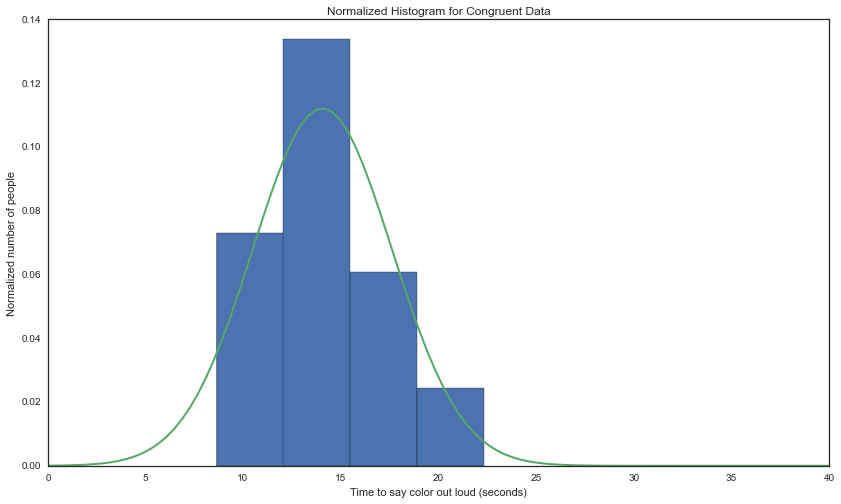

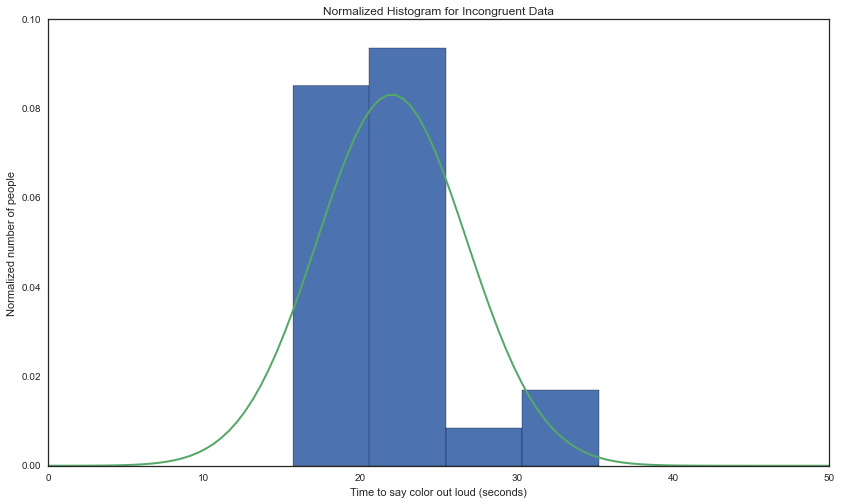

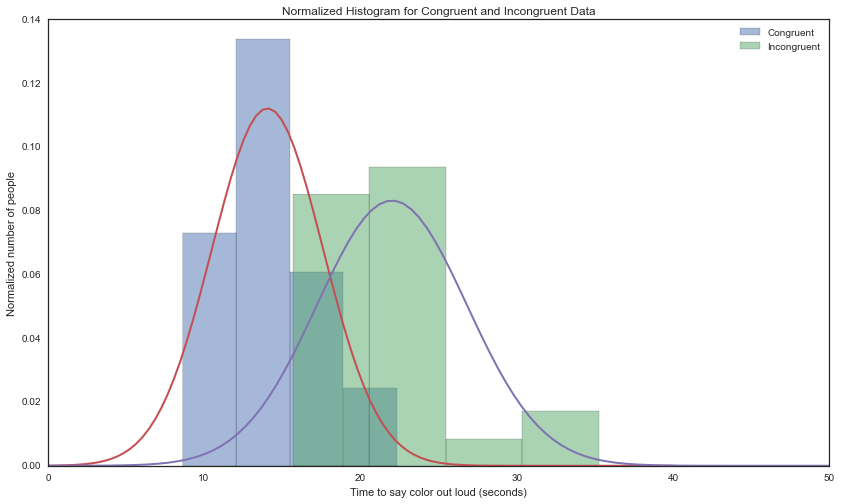

In [24]:
fig1 = plt.figure(1, figsize=(14,8))
ax1 = fig1.add_subplot(111)
ax1.hist(data['Congruent'].values, bins=4, normed=1)
ax1.plot(np.linspace(0, 40, 100), mlab.normpdf(np.linspace(0, 40, 100), xbar['Congruent'], sbar['Congruent']), linewidth=2.0)
ax1.set_title('Normalized Histogram for Congruent Data')
ax1.set_xlabel('Time to say color out loud (seconds)')
ax1.set_ylabel('Normalized number of people')

fig2 = plt.figure(2, figsize=(14,8))
ax2 = fig2.add_subplot(111)
ax2.hist(data['Incongruent'].values, bins=4, normed=1)
ax2.plot(np.linspace(0, 50, 100), mlab.normpdf(np.linspace(0, 50, 100), xbar['Incongruent'], sbar['Incongruent']), linewidth=2.0)
ax2.set_title('Normalized Histogram for Incongruent Data')
ax2.set_xlabel('Time to say color out loud (seconds)')
ax2.set_ylabel('Normalized number of people')

fig3 = plt.figure(3, figsize=(14,8))
ax3 = fig3.add_subplot(111)
ax3.hist(data['Congruent'].values, bins=4, normed=1, alpha=0.5)
ax3.hist(data['Incongruent'].values, bins=4, normed=1, alpha=0.5)
ax3.legend(['Congruent', 'Incongruent'])
ax3.plot(np.linspace(0, 40, 100), mlab.normpdf(np.linspace(0, 40, 100), xbar['Congruent'], sbar['Congruent']), linewidth=2.0)
ax3.plot(np.linspace(0, 50, 100), mlab.normpdf(np.linspace(0, 50, 100), xbar['Incongruent'], sbar['Incongruent']), linewidth=2.0)
ax3.set_title('Normalized Histogram for Congruent and Incongruent Data')
ax3.set_xlabel('Time to say color out loud (seconds)')
ax3.set_ylabel('Normalized number of people')

plt.show()


We see from the first figure that it actually approximates a normal distribution quite well. This isn't the case for the second figure. But since our sample size is quite small we wouldn't assume that they would look exactly like a normal distribution, so that doesn't matter. What is most interesting in my opinion is what we see when we plot the data on the same figure, as seen on the third figure. From this figure we actually see that there is not such a big difference between the two cases. In the following question we'll see if there is enough of a difference to reject the null.

** Q5 **

Now we want to perform the statistical test. First we'll use a t-table to find the two-tailed critical t for a 95% CI. Then we'll compute the t-statistic and at last we'll compute the 95% CI. We'll then see if this results in a statistical significance of the results which will allow us to reject the null.


In [25]:
# The t-critical was found from the following website 
# https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
# It was found by taking the degrees of freedom found above
# locating the closest value in the t-table (which was 50)
# and finding the value which corresponded to an alpha of 
# 0.025
tcrit = 2.009
t = tstat(xbar['D'], 0, samples_s, n)
ci = tconf(samples_m, tcrit, samples_s, n)

print "t-critical: %4.2f" % tcrit
print "t-statistic: %4.2f" % t
print "95%% CI: (%4.2f, %4.2f)" % (ci[0], ci[1])

t-critical: 2.01
t-statistic: 6.53
95% CI: (5.52, 10.41)


From the t-statistic and the confidence interval we see that we cannot reject the null. This was not what I expected since I found it much harder to say the words quickly in the incongruent case when taking the test myself. However, our sample was very small and by increasing the sample, we would've also decreased the standard deviation narrowing the two distributions and assuming that the means would stay the same, this could result in us not being able to reject the null.